# **Assignment Q3**

*All necessary imports are handled here*

*Note: All necessary graphs and plots are included in the notebook as well as in the "weighted_graph" directory for question 3"*

In [5]:
import csv
import matplotlib.pyplot as plt
from collections import defaultdict

*Defining the degree and clustering coefficient for weighted network and calculating the degree and clustering coefficient for weighted network*

In [ ]:
adjacency = defaultdict(lambda: defaultdict(float))

with open("C://Users//dhvan//Downloads//NetworkScience//Assignment1//weighted_graph//soc-sign-bitcoinalpha.csv", "r", encoding="utf-8") as f:
    reader = csv.reader(f)
    for row in reader:
        src, dst, weight, _ = row
        src, dst, weight = int(src), int(dst), float(weight)
        adjacency[src][dst] = adjacency[src].get(dst, 0) + weight

nodes = list(adjacency.keys())
weighted_degree = {}
for u in nodes:
    weighted_degree[u] = sum(abs(w) for w in adjacency[u].values())

# Weighted clustering coefficient
weighted_clustering = {}
for i in nodes:
    neighbors = list(adjacency[i].keys())
    ki = len(neighbors)
    if ki < 2:
        weighted_clustering[i] = 0.0
        continue
    si = sum(abs(adjacency[i][n]) for n in neighbors)
    tri_sum = 0.0
    for idx_j in range(ki):
        for idx_k in range(idx_j + 1, ki):
            j = neighbors[idx_j]
            k = neighbors[idx_k]
            if (j in adjacency) and (k in adjacency[j]):
                w_ij = abs(adjacency[i][j])
                w_ik = abs(adjacency[i][k])
                w_jk = abs(adjacency[j][k])
                tri_sum += (w_ij + w_ik) / 2 * w_jk
    weighted_clustering[i] = tri_sum / (si * (ki - 1))

Degree of a node in a weighted network is the sum of the weights of the edges connected to the node. The clustering coefficient of a node in a weighted network is the ratio of the sum of the weights of the edges connected to the node to the sum of the weights of all possible edges between the neighbors of the node.

*Plotting Weighted degree distribution*

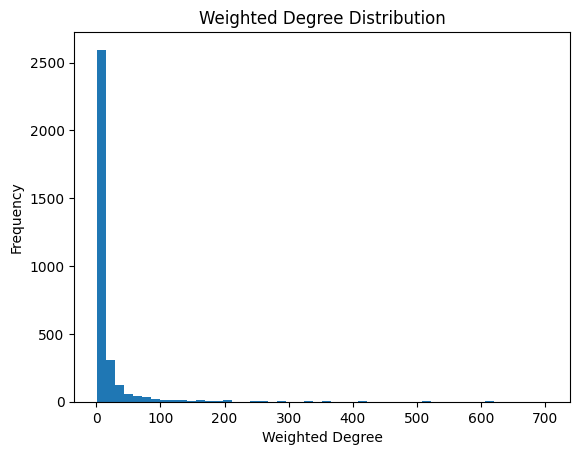

In [ ]:
plt.hist(weighted_degree.values(), bins=50)
plt.title("Weighted Degree Distribution")
plt.xlabel("Weighted Degree")
plt.ylabel("Frequency")
plt.savefig("weighted_degree_distribution.png")
plt.show()

*Plotting clustering coefficient v/s degree of network.*

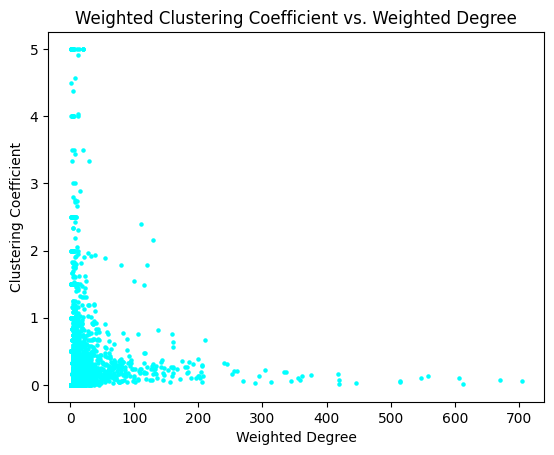

In [24]:
degrees = [weighted_degree[n] for n in nodes]
clusts = [weighted_clustering[n] for n in nodes]
plt.scatter(degrees, clusts, s=5, c="cyan")
plt.title("Weighted Clustering Coefficient vs. Weighted Degree")
plt.xlabel("Weighted Degree")
plt.ylabel("Clustering Coefficient")
plt.savefig("weighted_clustering_vs_weighted_degree.png")
plt.show()